<a href="https://colab.research.google.com/github/Rutuja9180/TSF_Data-Science-Business-Analytics/blob/main/TASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science and Businees Analytics [GRIP May21]**

## **Task 2: Prediction using Unsupervised ML**


### **Author : Rutuja Palamkar**


**Problem Statement :-** ***In this task it is required to predict the optimum number of cluster for the Iris Dataset. Iris Dataset consists of 3 types of flower namely Iris-setosa, Iris-versicolour and Iris-virginica***

## **Step 1:- Importing The Data**

In [12]:
# importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

# to ignore the warnings

import warnings as wg
wg.filterwarnings("ignore")

In [53]:
# reading the iris dataset

dataset = datasets.load_iris()
iris_dataset = pd.DataFrame(dataset.data, columns = dataset.feature_names)
iris_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## **Step 2:- Visualising The Data**

In [25]:
iris_dataset.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [27]:
iris_dataset.shape

(150, 4)

In [28]:
iris_dataset.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [33]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [34]:
iris_dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## **Step 3:- Finding the Optimum Number of Clusters**

In [38]:
# calculating the within_culster sum of sqaure

within_cluster_sum = []
cluster_range = range(1,15)
for k in cluster_range:
  km = KMeans(n_clusters=k)
  km = km.fit(iris_dataset)
  within_cluster_sum.append(km.inertia_)

**About The Elbow Method**

In this method, the number of clusters are varies within a certain range. For each number, within-cluster sum of square (wss) value is calculated and stored in a list. These value are then plotted against the range of number of clusters used before. The location of bend in the 2d plot indicates the appropiate number of clusters.

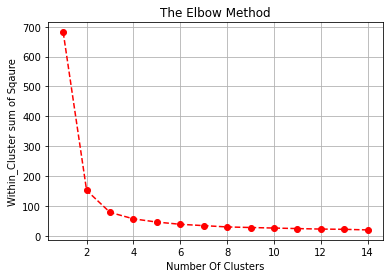

In [40]:
# plotting the "within_cluster_sum" against cluster range

plt.plot(cluster_range, within_cluster_sum, 'go--', color= 'red')
plt.title('The Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel("Within_Cluster sum of Sqaure")
plt.grid()
plt.show()

##**Step 4:- Applying K-Means Clustering on the Data**

In [46]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

##**Step 5:- Visualising The Clusters**

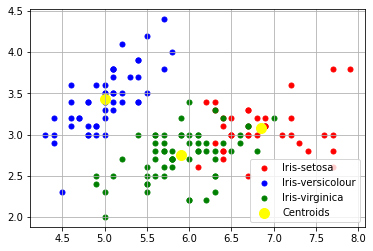

In [51]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s = 25, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 25, c = 'green', label = 'Iris-virginica')

# Plotting the Centers of the cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()
